In [1]:
import pandas as pd # importing all necessary Libraries 
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
miss_df = pd.read_csv(r"pima_indians_diabetes_miss.csv") # Reading pima_indians_diabetes_miss.csv file using panda
original_df = pd.read_csv(r"pima_indians_diabetes_original.csv") # Reading pima_indians_diabetes_original.csv file using panda
attributes = list(miss_df.head()) # grabing attributes

In [3]:
def Graph(freq,title,xlabel,ylabel): # defining funtion to plot graph
    y = np.arange(len(attributes))
    plt.bar(y,freq,align='center',width=0.12,color='red',alpha=0.8)
    plt.scatter(y,freq,color='blue',alpha=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(y,attributes)
    plt.show()

In [4]:
def Q1(): # function that count null values of each attribute and plot the graph using Graph() function
	CountNull = miss_df.isnull().sum();Graph(CountNull,"SOLUTION OF Q1",'Attribute','Frequency of Missing Values')


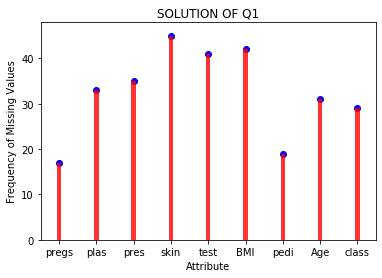

In [5]:
Q1()

In [6]:
def Q2():
    print("\n_______2(a)._______\n")
    print("Delete (drop) the tuples (rows) having equal to or more than one third of attributes with missing values")
    dropRow=[] # list contains rows that are to drop 
    for i in miss_df.index: # using loop to find the rows that contain null values greater than 3
        if miss_df.loc[i].isnull().sum()>=3 :
            dropRow.append(i)
    print("* Total rows deleted:",len(dropRow)) # printing number of rows to delete 
    print("* Row number of deleted tuples:",*dropRow)
    print("\n_______2(b)._______\n")
    print("Drop the tuples (rows) having missing value in the target (class) attribute")
    miss_df.drop(dropRow,inplace=True) # droping tuples of specific rows
    row_emptyClass=miss_df[miss_df['class'].isnull()].index.tolist() # making list that contain null value of attribute class 
    miss_df.drop(row_emptyClass,inplace=True)  # drping tuples on the basis of rows that has empty value in class attribute
    print("* Total rows deleted:",len(row_emptyClass))   
    print("* Row number of deleted tuple:",*row_emptyClass)


In [7]:
Q2()


_______2(a)._______

Delete (drop) the tuples (rows) having equal to or more than one third of attributes with missing values
* Total rows deleted: 39
* Row number of deleted tuples: 1 39 40 53 54 83 89 103 125 136 145 210 211 212 213 249 250 254 280 281 284 314 321 335 429 430 449 450 451 471 472 473 474 718 719 720 721 753 766

_______2(b)._______

Drop the tuples (rows) having missing value in the target (class) attribute
* Total rows deleted: 21
* Row number of deleted tuple: 8 13 28 29 35 62 92 95 107 110 130 131 132 133 149 182 188 218 308 746 748


In [8]:
def Q3():
    print("\n* The number of missing values in each attributes")
    nullvalue= miss_df.isnull().sum() # getting total null values of each attribute
    data = {"Attribute":attributes,"Total null values":nullvalue}
    data = pd.DataFrame(data) # forming data in tabular form
    data= data.set_index(["Attribute"])
    print(data)
    print("\n* Total Missing Value in file:",sum(nullvalue))


In [9]:
Q3()


* The number of missing values in each attributes
           Total null values
Attribute                   
pregs                      0
plas                      12
pres                       9
skin                       8
test                       8
BMI                       12
pedi                       2
Age                       18
class                      0

* Total Missing Value in file: 69


In [19]:
l=[] # list that contain list of rows of each attribute that has missing values 
def nullRows(s): #using this funtion we find the list of row of an attribute that has empty value
    a=(miss_df[miss_df[s].isnull()].index.tolist())
    l.append(a)

def DataFrame(t): # function for calculation mean, median, mode , standard deviation of each attribute of the data
    data = {"Attributes":attributes,"mean":t.mean().tolist(),
                "median":t.median().tolist(),
                "mode":t.mode().iloc[0].tolist(),
                "std":t.std().tolist()}
    dataFrame = pd.DataFrame(data) # forming data in tabular form
    dataFrame = dataFrame.set_index(["Attributes"])
    print(dataFrame)

def RMSE(attribute,nullRows,data): # function to calculate RMSE of an attribute
    rms=0
    for i in nullRows:
        rms += (data[attribute].loc[i]-original_df[attribute].loc[i])**2  # using formula of RMSE
    if rms == 0:
        return rms
    return (rms/len(nullRows))**0.5

def showRMSE(t): # funtion to show the RMSE of each attribute in a tabular form using dataframe
    rmselist=[]
    for i in range(len(attributes)):
        rmselist.append(RMSE(attributes[i],l[i],t))
    data = {"Attribute":attributes,"RMSE":rmselist}
    data = pd.DataFrame(data) # forming data in a tabular form
    data = data.set_index(["Attribute"])
    print(data)
    Graph(rmselist,'','Attribute','RMSE') # using Graph function to draw the graph between RMS and attribute
    

In [20]:
def Q4(): 
    print("\n_______4(a)._______")
    print("Null Value of Data filled using mean\n\n(i).\n")
    print("* Missing Data: Mean, median, mode and standard deviation ")
    fix_using_mean = miss_df.fillna(round(miss_df.mean())) # filling null value of data using mean of each attribute        
    DataFrame(fix_using_mean) # using DataFrame Function to show mean,median,mode etc. of missing data
    print("\n* Original Data: Mean, median, mode and standard deviation ")
    DataFrame(original_df) # using DataFrame Function to show mean,median,mode etc. of original data
    print("\n(ii).\n\n* Calculated RMSE of each attribute")
    showRMSE(fix_using_mean)  # using showRMSE function to show RMSE of data
    print()
    print("_______4(b)._______")
    print("Null Value of Data filled using linear interpolation\n\n(i).\n")
    print("* Missing Data: Mean, median, mode and standard deviation")
    fix_using_interpolate = miss_df.fillna(round(miss_df.interpolate())) # filling null value of data using interpolation in each attribute 
    DataFrame(fix_using_interpolate) # using DataFrame Function to show mean,median,mode etc. of missing data
    print("\n*Original Data: Mean, median, mode and standard deviation ")
    DataFrame(original_df) # using DataFrame Function to show mean,median,mode etc. of original data
    print("(ii).")
    print("\n(ii).\n\n* Calculated RMSE of each attribute")
    showRMSE(fix_using_interpolate) # using showRMSE function to show RMSE of data


_______4(a)._______
Null Value of Data filled using mean

(i).

* Missing Data: Mean, median, mode and standard deviation 
                  mean    median     mode         std
Attributes                                           
pregs         3.885593    3.0000    1.000    3.373860
plas        120.672316  118.0000  121.000   30.990211
pres         69.001412   72.0000   70.000   19.691360
skin         20.344633   23.0000    0.000   15.946246
test         77.816384   36.0000    0.000  110.607607
BMI          32.009181   32.0000   32.000    7.764755
pedi          0.474698    0.3805    0.254    0.334157
Age          33.091808   29.0000   22.000   11.519680
class         0.343220    0.0000    0.000    0.475120

* Original Data: Mean, median, mode and standard deviation 
                  mean    median    mode         std
Attributes                                          
pregs         3.845052    3.0000   1.000    3.369578
plas        120.894531  117.0000  99.000   31.972618
pres     

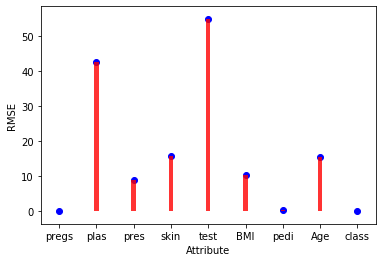


_______4(b)._______
Null Value of Data filled using linear interpolation

(i).

* Missing Data: Mean, median, mode and standard deviation
                  mean    median    mode         std
Attributes                                          
pregs         3.885593    3.0000   1.000    3.373860
plas        120.348870  117.0000  99.000   31.274096
pres         69.108757   72.0000  70.000   19.735687
skin         20.391243   23.0000   0.000   15.975610
test         77.354520   27.0000   0.000  110.755858
BMI          32.045904   32.2500  32.000    7.792990
pedi          0.477523    0.3825   0.254    0.334359
Age          33.211864   29.0000  22.000   11.650511
class         0.343220    0.0000   0.000    0.475120

*Original Data: Mean, median, mode and standard deviation 
                  mean    median    mode         std
Attributes                                          
pregs         3.845052    3.0000   1.000    3.369578
plas        120.894531  117.0000  99.000   31.972618
pres  

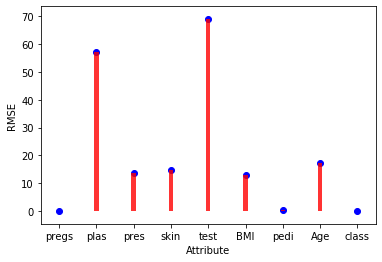

In [21]:
for i in attributes:
    nullRows(i)
Q4()

In [22]:
def outliner(data,attr): # funtio to calculate the outliner of an attribute 
    minimum = 2.5 * np.percentile(data[attr], 25) - 1.5 * np.percentile(data[attr], 75)
    maximum = 2.5 * np.percentile(data[attr], 75) - 1.5 * np.percentile(data[attr], 25)
    return pd.concat((data[attr][data[attr] < minimum], data[attr][data[attr] > maximum])) # returning data in a tabular form that conatin only outliner  

def boxplot(data): # function to ploting boxploit of Age and BMI boxplot 
    fig,axs=plt.subplots(1,2,figsize=(5,6)) 
    data.boxplot(column=['Age'],ax=axs[0])
    data.boxplot(column=['BMI'],ax=axs[1])
    fig.tight_layout(pad=2.0)
    plt.show()

In [23]:
def Q5():
    print("_______5(a)._______")
    print("Replacing the missing values by interpolation method")
    print("* Box Plot of attribute 'Age' and 'BMI'")
    #a = miss_df.fillna(round(miss_df.interpolate())) # filling null value of data using interpolation in each attribute
    miss_df.fillna(round(miss_df.interpolate()),inplace=True)
    print(f"(i). Outliner in Age: {outliner(miss_df,'Age').values}") # printing outliner of Age attribute using outlier function
    print(f"(ii). Outliner in BMI: {outliner(miss_df,'BMI').values}") # printing outliner of BMI attribute using outlier function
     # printing outliner of BMI attribute using outlier function
    
    #a.drop(outliner(miss_df,'Age').index,inplace=True)
    #print(len(a['Age']),len(miss_df['Age']))
    #print(f"(ii). Outliner in age: {outliner(a,'Age')}")
    #boxplot(miss_df)
    #miss_df['Age'][outliner(miss_df,"Age").index] = a['Age'].median()
     # ploting boxplot
    boxplot(miss_df)
    print("_______5(b)._______")
    print("Replacing the outliners using median of data")
    print("* Box Plot of attribute 'Age' and 'BMI'")
    miss_df['Age'][outliner(miss_df,"Age").index] = miss_df['Age'].median() # replacing the outliner using median of the attribute
    miss_df['BMI'][outliner(miss_df,"BMI").index] = miss_df['BMI'].median()
    print(f"(i). Outliner in Age: {outliner(miss_df,'Age').values}") # printing outliner of Age attribute using outlier function
    print(f"(ii). Outliner in BMI: {outliner(miss_df,'BMI').values}")
    boxplot(miss_df) # ploting boxplot

_______5(a)._______
Replacing the missing values by interpolation method
* Box Plot of attribute 'Age' and 'BMI'
(i). Outliner in Age: [69. 67. 72. 81. 67. 70. 68. 69.]
(ii). Outliner in BMI: [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  53.2 67.1 52.3 52.3 52.9
 59.4 57.3]


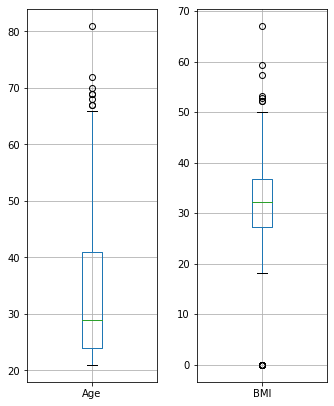

_______5(b)._______
Replacing the outliners using median of data
* Box Plot of attribute 'Age' and 'BMI'
(i). Outliner in Age: [65. 66. 65. 65. 66. 66. 66.]
(ii). Outliner in BMI: []


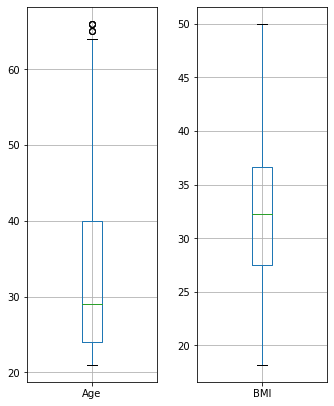

In [24]:
Q5()